In [10]:
# importing data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Load the dataset
energy_consumption_df = pd.read_csv("/content/FILES DUMP/energy-consumption-by-source-and-region.csv")

In [11]:
energy_consumption_df.head()

,Entity,Code,Year,Oil Consumption - EJ,Gas Consumption - EJ,Coal Consumption - EJ,Solar Consumption - EJ,Hydro Consumption - EJ,Nuclear Consumption - EJ,Wind Consumption - EJ,Geo Biomass Other - EJ
0,Algeria,DZA,1965,15.405264,7.430506,0.814101,0.0,1.111112,0.0,0.0,0.0
1,Algeria,DZA,1966,20.272721,7.719256,0.790841,0.0,0.986112,0.0,0.0,0.0
2,Algeria,DZA,1967,18.942046,7.488256,0.604760,0.0,1.138890,0.0,0.0,0.0
3,Algeria,DZA,1968,20.167318,7.873256,0.639651,0.0,1.563890,0.0,0.0,0.0
4,Algeria,DZA,1969,21.305947,10.351696,0.814101,0.0,1.002779,0.0,0.0,0.0


Data Cleaning


In [12]:
# Understanding the basic ground information of my data
def all_about_my_data(df):
    print("Here is some Basic Ground Info about your Data:\n")

    # Shape of the dataframe
    print("Number of Instances:",df.shape[0])
    print("Number of Features:",df.shape[1])

    # Summary Stats
    print("\nSummary Stats:")
    print(df.describe())

    # Missing Value Inspection
    print("\nMissing Values:")
    print(df.isna().sum())

all_about_my_data(energy_consumption_df)

Here is some Basic Ground Info about your Data:

Number of Instances: 5515
Number of Features: 11

Summary Stats:
              Year  Oil Consumption - EJ  Gas Consumption - EJ  \
count  5515.000000           4139.000000           4145.000000   
mean   1993.522393           1011.463696            548.258342   
std      16.979473           4680.229995           2697.775400   
min    1900.000000              0.571998              0.000000   
25%    1981.000000             63.741789              8.403757   
50%    1995.000000            142.531989             51.675541   
75%    2007.500000            413.589372            223.762679   
max    2019.000000          53619.924660          39292.467570   

       Coal Consumption - EJ  Solar Consumption - EJ  Hydro Consumption - EJ  \
count            4145.000000             4145.000000             4145.000000   
mean              737.574797                3.540386              162.425080   
std              3686.446745               47.12157

In [13]:
energy_consumption_df = energy_consumption_df.drop(['Code'], axis = 1)
energy_consumption_df.head()

,Entity,Year,Oil Consumption - EJ,Gas Consumption - EJ,Coal Consumption - EJ,Solar Consumption - EJ,Hydro Consumption - EJ,Nuclear Consumption - EJ,Wind Consumption - EJ,Geo Biomass Other - EJ
0,Algeria,1965,15.405264,7.430506,0.814101,0.0,1.111112,0.0,0.0,0.0
1,Algeria,1966,20.272721,7.719256,0.790841,0.0,0.986112,0.0,0.0,0.0
2,Algeria,1967,18.942046,7.488256,0.604760,0.0,1.138890,0.0,0.0,0.0
3,Algeria,1968,20.167318,7.873256,0.639651,0.0,1.563890,0.0,0.0,0.0
4,Algeria,1969,21.305947,10.351696,0.814101,0.0,1.002779,0.0,0.0,0.0


In [14]:
energy_consumption_df.dtypes

,0
Entity,object
Year,int64
Oil Consumption - EJ,float64
Gas Consumption - EJ,float64
Coal Consumption - EJ,float64
Solar Consumption - EJ,float64
Hydro Consumption - EJ,float64
Nuclear Consumption - EJ,float64
Wind Consumption - EJ,float64
Geo Biomass Other - EJ,float64


In [15]:
cols = energy_consumption_df.columns.str.replace('-.*',"")
cols = cols.str.replace(" ","_")
cols = cols.str.replace("_$","")
cols = list(cols.str.casefold())
cols

['entity',
 'year',
 'oil_consumption_-_ej',
 'gas_consumption_-_ej',
 'coal_consumption_-_ej',
 'solar_consumption_-_ej',
 'hydro_consumption_-_ej',
 'nuclear_consumption_-_ej',
 'wind_consumption_-_ej',
 'geo_biomass_other_-_ej']

In [16]:
cols[0] = 'country'
cols

['country',
 'year',
 'oil_consumption_-_ej',
 'gas_consumption_-_ej',
 'coal_consumption_-_ej',
 'solar_consumption_-_ej',
 'hydro_consumption_-_ej',
 'nuclear_consumption_-_ej',
 'wind_consumption_-_ej',
 'geo_biomass_other_-_ej']

In [17]:
# Re-assigning feature names
energy_consumption_df=energy_consumption_df.rename(columns=dict(zip(energy_consumption_df.columns,cols)))
energy_consumption_df.head()

,country,year,oil_consumption_-_ej,gas_consumption_-_ej,coal_consumption_-_ej,solar_consumption_-_ej,hydro_consumption_-_ej,nuclear_consumption_-_ej,wind_consumption_-_ej,geo_biomass_other_-_ej
0,Algeria,1965,15.405264,7.430506,0.814101,0.0,1.111112,0.0,0.0,0.0
1,Algeria,1966,20.272721,7.719256,0.790841,0.0,0.986112,0.0,0.0,0.0
2,Algeria,1967,18.942046,7.488256,0.604760,0.0,1.138890,0.0,0.0,0.0
3,Algeria,1968,20.167318,7.873256,0.639651,0.0,1.563890,0.0,0.0,0.0
4,Algeria,1969,21.305947,10.351696,0.814101,0.0,1.002779,0.0,0.0,0.0


In [18]:
# dropping years before 1965
energy_consumption_df = energy_consumption_df[energy_consumption_df['year'] >= 1965]
energy_consumption_df.head()

,country,year,oil_consumption_-_ej,gas_consumption_-_ej,coal_consumption_-_ej,solar_consumption_-_ej,hydro_consumption_-_ej,nuclear_consumption_-_ej,wind_consumption_-_ej,geo_biomass_other_-_ej
0,Algeria,1965,15.405264,7.430506,0.814101,0.0,1.111112,0.0,0.0,0.0
1,Algeria,1966,20.272721,7.719256,0.790841,0.0,0.986112,0.0,0.0,0.0
2,Algeria,1967,18.942046,7.488256,0.604760,0.0,1.138890,0.0,0.0,0.0
3,Algeria,1968,20.167318,7.873256,0.639651,0.0,1.563890,0.0,0.0,0.0
4,Algeria,1969,21.305947,10.351696,0.814101,0.0,1.002779,0.0,0.0,0.0


In [19]:
# fill NaN with 0
energy_consumption_df = energy_consumption_df.fillna(0)
og_df = energy_consumption_df.copy()
energy_consumption_df.head()

,country,year,oil_consumption_-_ej,gas_consumption_-_ej,coal_consumption_-_ej,solar_consumption_-_ej,hydro_consumption_-_ej,nuclear_consumption_-_ej,wind_consumption_-_ej,geo_biomass_other_-_ej
0,Algeria,1965,15.405264,7.430506,0.814101,0.0,1.111112,0.0,0.0,0.0
1,Algeria,1966,20.272721,7.719256,0.790841,0.0,0.986112,0.0,0.0,0.0
2,Algeria,1967,18.942046,7.488256,0.604760,0.0,1.138890,0.0,0.0,0.0
3,Algeria,1968,20.167318,7.873256,0.639651,0.0,1.563890,0.0,0.0,0.0
4,Algeria,1969,21.305947,10.351696,0.814101,0.0,1.002779,0.0,0.0,0.0


In [20]:
all_about_my_data(energy_consumption_df)

Here is some Basic Ground Info about your Data:

Number of Instances: 5450
Number of Features: 10

Summary Stats:
              year  oil_consumption_-_ej  gas_consumption_-_ej  \
count  5450.000000           5450.000000           5450.000000   
mean   1994.256147            768.155640            416.978134   
std      15.551644           4101.386149           2364.257058   
min    1965.000000              0.000000              0.000000   
25%    1981.000000              6.619957              0.000000   
50%    1995.000000             92.455329             20.846689   
75%    2008.000000            276.772243            135.904711   
max    2019.000000          53619.924660          39292.467570   

       coal_consumption_-_ej  solar_consumption_-_ej  hydro_consumption_-_ej  \
count            5450.000000             5450.000000             5450.000000   
mean              560.962850                2.692642              123.532469   
std              3230.215241               41.12109

World energy consumption from 1965 to 2019

In [21]:
world_consumption_df = energy_consumption_df[energy_consumption_df['country'] == 'World']
world_consumption_df.head()

,country,year,oil_consumption_-_ej,gas_consumption_-_ej,coal_consumption_-_ej,solar_consumption_-_ej,hydro_consumption_-_ej,nuclear_consumption_-_ej,wind_consumption_-_ej,geo_biomass_other_-_ej
5281,World,1965,18108.64332,6303.803972,16140.19120,0.0,2564.440729,70.943735,0.0,49.959018
5282,World,1966,19496.47113,6868.800021,16324.10691,0.0,2732.827289,95.648105,0.0,55.016730
5283,World,1967,20890.58046,7374.045272,16060.82258,0.0,2793.731823,113.905686,0.0,55.518296
5284,World,1968,22675.46603,8044.337930,16301.15972,0.0,2942.471820,144.758905,0.0,61.444619
5285,World,1969,24576.88446,8833.425133,16798.74928,0.0,3115.955885,171.620725,0.0,64.605508


Text(0.5, 1.0, 'World energy consumption through different sources \n')

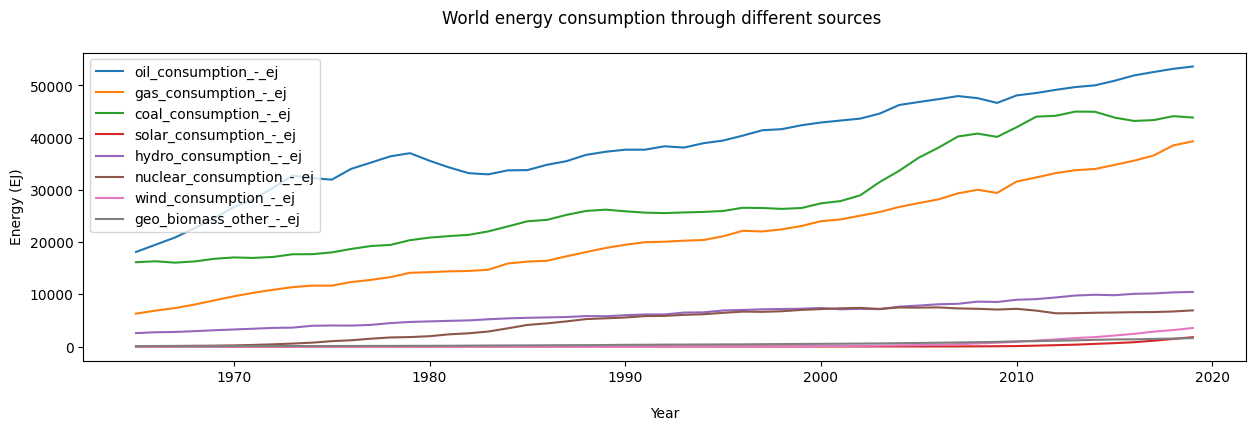

In [22]:
world_consumption_df.set_index('year', inplace=True)
world_consumption_df.plot(figsize = (15,4))
plt.xlabel("\nYear")
plt.ylabel("Energy (EJ)")
plt.title("World energy consumption through different sources \n")

In [38]:
# Check the actual column names in the dataset
print(og_df.columns)


Index(['country', 'year', 'oil_consumption_-_ej', 'gas_consumption_-_ej',
       'coal_consumption_-_ej', 'solar_consumption_-_ej',
       'hydro_consumption_-_ej', 'nuclear_consumption_-_ej',
       'wind_consumption_-_ej', 'geo_biomass_other_-_ej'],
      dtype='object')


In [39]:
# Use the correct column names based on the actual DataFrame columns
fossil_df = og_df[['country', 'year', 'oil_consumption_-_ej', 'gas_consumption_-_ej', 'coal_consumption_-_ej']]

# Filter for the years 2009 to 2019
fossil_df = fossil_df[fossil_df['year'].between(2009, 2019)]

# Check the first few rows
fossil_df.head()


,country,year,oil_consumption_-_ej,gas_consumption_-_ej,coal_consumption_-_ej
44,Algeria,2009,180.134574,262.117835,5.652185
45,Algeria,2010,180.048999,253.272453,3.605303
46,Algeria,2011,192.227807,267.969839,3.198253
47,Algeria,2012,204.395431,298.740989,3.395963
48,Algeria,2013,213.576556,321.215382,1.837541


In [40]:
# creating new df representing change
keys = fossil_df.keys()
keys = keys.drop('country')
keys = keys.drop('year')
country_list = []
source_list = []
value_list = []
for country in fossil_df.country.unique():
    country_df = fossil_df[fossil_df.country==country]
    if country_df[country_df.year==2009].empty or country_df[country_df.year==2019].empty:
        continue
    for key in keys:
        value_2009 = float(country_df[country_df.year==2009][key])
        value_2019 = float(country_df[country_df.year==2019][key])
        #check for 0 value and nan value
        if value_2009!=0 and value_2009==value_2009:
            # percentage increase from 2009 till 2019
            per = ((value_2019-value_2009)/value_2009)*100
            country_list.append(country)
            source_list.append(key)
            value_list.append(per)
per_change_df = pd.DataFrame({'country':country_list,'source':source_list,'per_change_2009_2019':value_list})
# Droping the world data
index_names = per_change_df[per_change_df['country'] == 'World'].index
per_change_df.drop(index_names, inplace = True)

<ipython-input-40-fc5243313473>:13: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  value_2009 = float(country_df[country_df.year==2009][key])
<ipython-input-40-fc5243313473>:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  value_2019 = float(country_df[country_df.year==2019][key])


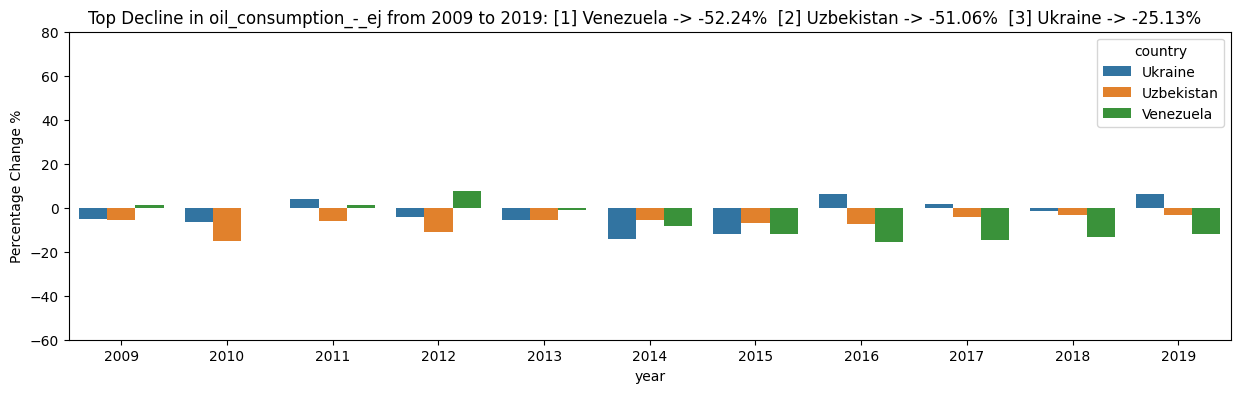

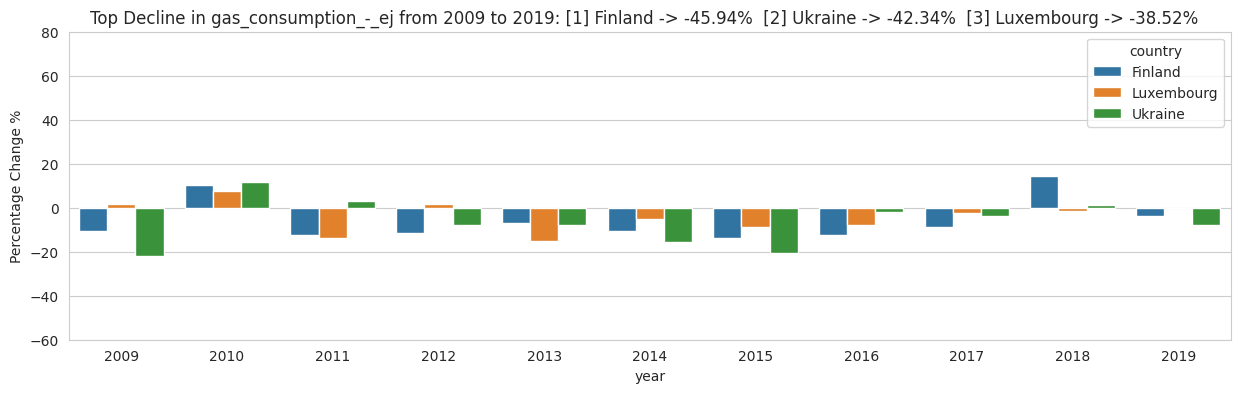

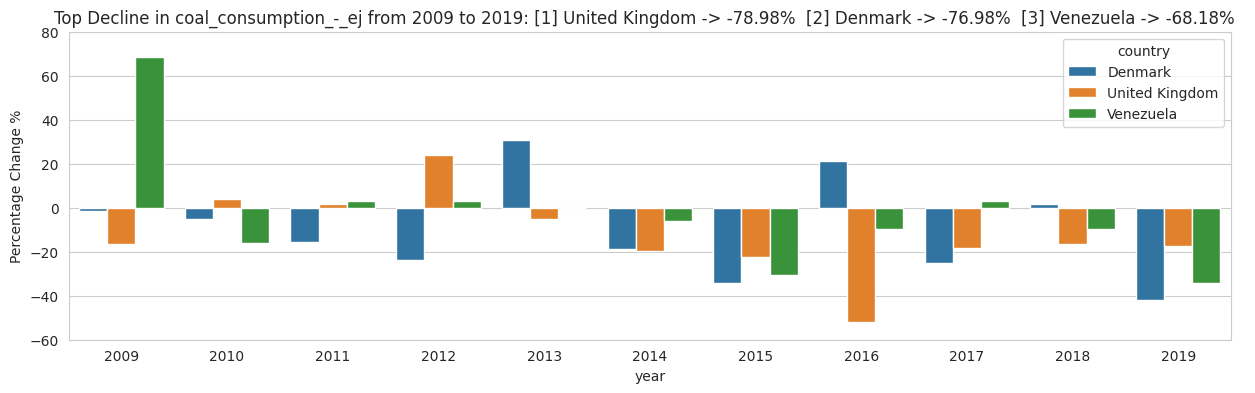

In [41]:
# plotting
i = 0
for key in keys:
    per_change = per_change_df[per_change_df.source==key]
    # Sort values in decreasing order [highest on top]
    per_change = per_change.sort_values(by='per_change_2009_2019', ascending=True).head(3)
    # Get values from the original data frame
    df_top_change = og_df[og_df['country'].isin(list(per_change.country))]
    df_top_change = df_top_change[['country','year',key]]
    values = df_top_change[key]
    # Calculating Percentage change in consumption and multiply with 100 to get % values
    df_top_change['Percentage Change %'] = values.pct_change()*100
    # Selecting only rows with year >= 2009
    df_top_change = df_top_change[df_top_change.year>=2009]
    plt.figure(i,figsize=(15,4))
    sns.barplot(x='year',y='Percentage Change %',hue='country',data=df_top_change)
    sns.set_style("whitegrid")
    # Creating title to show top nations that relatively reduced their consumption
    title = ''
    for i in range(len(list(per_change.country))):
        title+= f'[{i+1}] {list(per_change.country)[i]} -> {round(list(per_change.per_change_2009_2019)[i],2)}%  '
    plt.title(f'Top Decline in {key} from 2009 to 2019: {title}')
    plt.ylim(-60,80)
    plt.show()
    i+=1

Most promising environmental friendly energy resource

In [42]:
world_df = og_df.copy()
index_names = world_df[world_df['country'] == 'World'].index
world_df.drop(index_names, inplace = True)
world_df.head()

,country,year,oil_consumption_-_ej,gas_consumption_-_ej,coal_consumption_-_ej,solar_consumption_-_ej,hydro_consumption_-_ej,nuclear_consumption_-_ej,wind_consumption_-_ej,geo_biomass_other_-_ej
0,Algeria,1965,15.405264,7.430506,0.814101,0.0,1.111112,0.0,0.0,0.0
1,Algeria,1966,20.272721,7.719256,0.790841,0.0,0.986112,0.0,0.0,0.0
2,Algeria,1967,18.942046,7.488256,0.604760,0.0,1.138890,0.0,0.0,0.0
3,Algeria,1968,20.167318,7.873256,0.639651,0.0,1.563890,0.0,0.0,0.0
4,Algeria,1969,21.305947,10.351696,0.814101,0.0,1.002779,0.0,0.0,0.0


In [45]:
# Dropping fossil fuel sources and analyzing only environmental-friendly sources
# We use correct column names based on your dataset
world_df = og_df.groupby(['year'])[['solar_consumption_-_ej', 'hydro_consumption_-_ej',
                                    'nuclear_consumption_-_ej', 'wind_consumption_-_ej',
                                    'geo_biomass_other_-_ej']].sum()

# Keeping a backup of the dataframe
world_df_bup = world_df.copy()
world_df_bup.head()



,solar_consumption_-_ej,hydro_consumption_-_ej,nuclear_consumption_-_ej,wind_consumption_-_ej,geo_biomass_other_-_ej
year,,,,,
1965,0.0,5036.228450,141.887470,0.0,99.918036
1966,0.0,5361.564669,191.262877,0.0,110.033460
1967,0.0,5477.860024,227.705816,0.0,111.036593
1968,0.0,5766.934346,289.467810,0.0,122.889238
1969,0.0,6098.302649,343.099783,0.0,129.211017


In [46]:
# years >= 1999
world_df_bup = world_df_bup.reset_index()
world_df_bup = world_df_bup[world_df_bup.year >=1999]
world_df_bup.head()

,year,solar_consumption_-_ej,hydro_consumption_-_ej,nuclear_consumption_-_ej,wind_consumption_-_ej,geo_biomass_other_-_ej
34,1999,5.089681,13872.689918,14018.469461,117.511409,970.862385
35,2000,6.205154,14114.971908,14332.770247,173.844261,1016.605420
36,2001,7.703036,13658.458858,14641.947644,211.152439,1041.277816
37,2002,9.637711,13807.024027,14779.206156,285.976674,1113.655846
38,2003,12.259498,13675.545356,14387.729586,341.855001,1168.442447


In [47]:
sources = world_df_bup.keys()
sources = sources.drop('year')
sources

Index(['solar_consumption_-_ej', 'hydro_consumption_-_ej',
       'nuclear_consumption_-_ej', 'wind_consumption_-_ej',
       'geo_biomass_other_-_ej'],
      dtype='object')

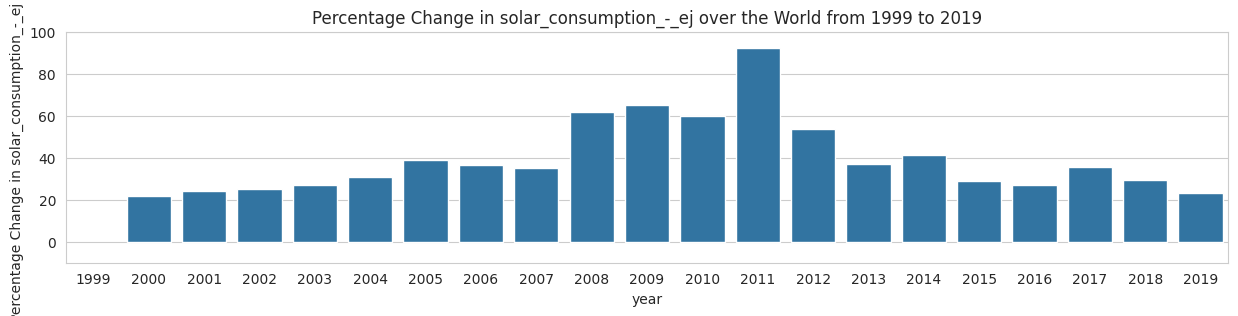

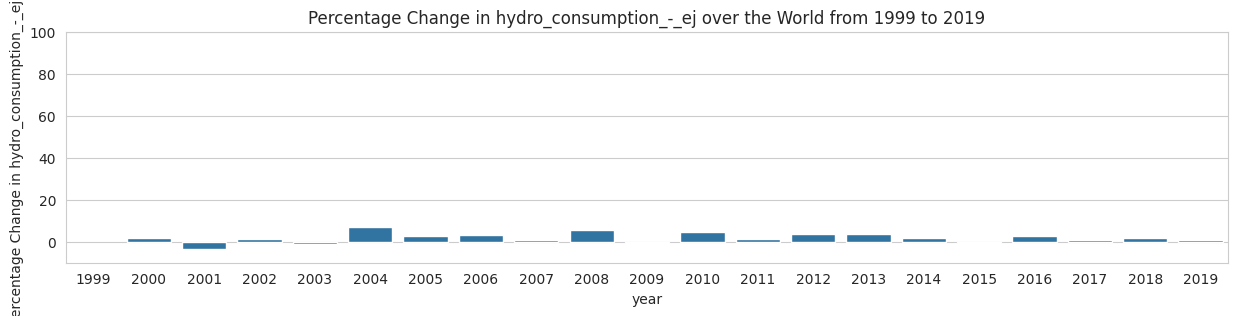

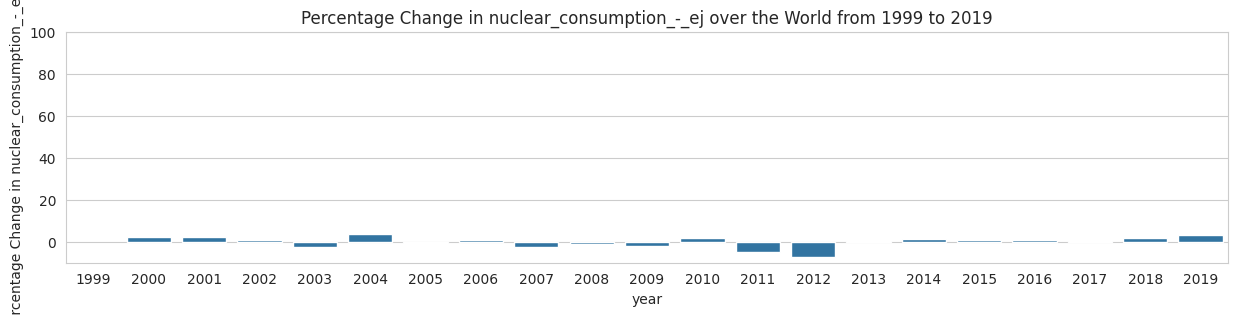

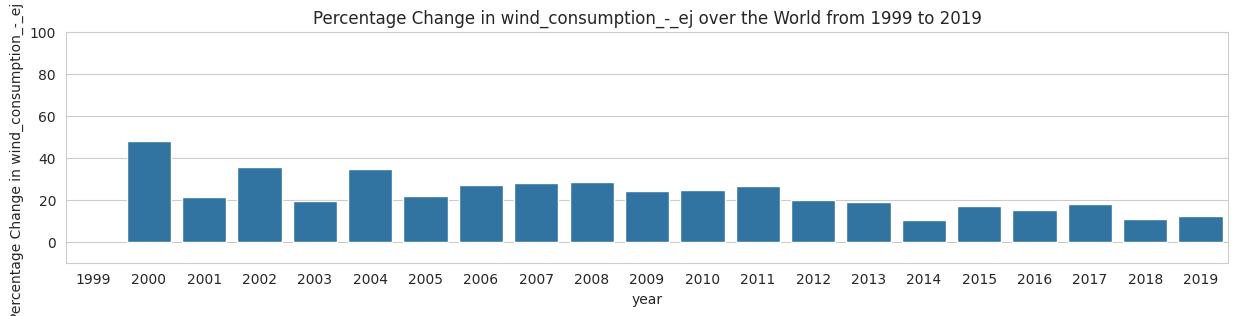

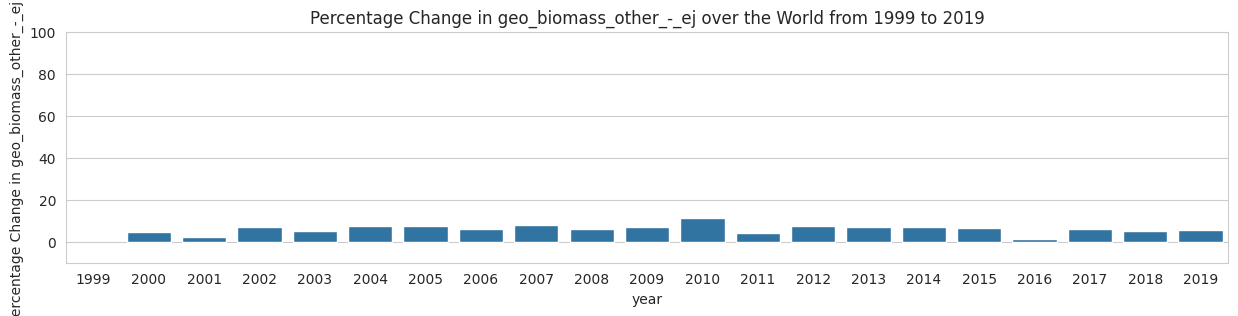

In [48]:
# Calculating percentage change for each resource over years from 1965 to 2019
i = 0
for source in sources:
    values = world_df_bup[source]
    # calculate and replace percentage change
    world_df_bup[f'Percentage Change in {source} (%)'] = values.pct_change()*100
    # Changing the figure size to make the axis readable
    plt.figure(i,figsize=(15,3))
    b = sns.barplot(x='year',y=f'Percentage Change in {source} (%)',data=world_df_bup)
    plt.title(f'Percentage Change in {source} over the World from 1999 to 2019')
    plt.ylim(-10, 100)
    plt.show()
    i+=1

Which countries get the highest share of energy from low-carbon sources?

In [51]:
# Make a copy of the DataFrame
lowcarbon_df = energy_consumption_df.copy()

# Set 'year' as the index
lowcarbon_df.set_index('year', inplace=True)

# List of columns representing energy consumption values to include in the "total"
# Exclude non-numeric columns like 'country'
consumption_columns = ['oil_consumption_-_ej', 'gas_consumption_-_ej', 'coal_consumption_-_ej',
                       'solar_consumption_-_ej', 'hydro_consumption_-_ej',
                       'nuclear_consumption_-_ej', 'wind_consumption_-_ej',
                       'geo_biomass_other_-_ej']

# Calculate the total energy consumption across selected columns
lowcarbon_df["total"] = lowcarbon_df[consumption_columns].sum(axis=1)

# Reset the index to bring 'year' back as a column
lowcarbon_df = lowcarbon_df.reset_index()

# Display the first few rows of the updated DataFrame
lowcarbon_df.head()


,year,country,oil_consumption_-_ej,gas_consumption_-_ej,coal_consumption_-_ej,solar_consumption_-_ej,hydro_consumption_-_ej,nuclear_consumption_-_ej,wind_consumption_-_ej,geo_biomass_other_-_ej,total
0,1965,Algeria,15.405264,7.430506,0.814101,0.0,1.111112,0.0,0.0,0.0,24.760983
1,1966,Algeria,20.272721,7.719256,0.790841,0.0,0.986112,0.0,0.0,0.0,29.768930
2,1967,Algeria,18.942046,7.488256,0.604760,0.0,1.138890,0.0,0.0,0.0,28.173953
3,1968,Algeria,20.167318,7.873256,0.639651,0.0,1.563890,0.0,0.0,0.0,30.244114
4,1969,Algeria,21.305947,10.351696,0.814101,0.0,1.002779,0.0,0.0,0.0,33.474522


In [52]:
# Define the columns that represent low-carbon consumption
lowcarbon = ['solar_consumption_-_ej', 'nuclear_consumption_-_ej', 'hydro_consumption_-_ej', 'wind_consumption_-_ej', 'geo_biomass_other_-_ej']

# Calculate the low-carbon consumption by summing the specified columns
lowcarbon_df['lowcarbon_consumption'] = lowcarbon_df[lowcarbon].sum(axis=1)

# Filter the DataFrame to only include data for the year 2019
lowcarbon_df = lowcarbon_df[lowcarbon_df['year'] == 2019]

# Drop the 'year' column since it's no longer needed
lowcarbon_df = lowcarbon_df.drop(columns=['year'])

# Set 'country' as the index
lowcarbon_df.set_index('country', inplace=True)

# Drop rows where 'total' is 0
lowcarbon_df = lowcarbon_df[lowcarbon_df['total'] != 0]

# Reset index and display the first few rows
lowcarbon_df.reset_index().head()


,country,oil_consumption_-_ej,gas_consumption_-_ej,coal_consumption_-_ej,solar_consumption_-_ej,hydro_consumption_-_ej,nuclear_consumption_-_ej,wind_consumption_-_ej,geo_biomass_other_-_ej,total,lowcarbon_consumption
0,Algeria,244.927174,452.375362,5.815005,1.522874,0.375147,0.000000,0.024762,0.000000,705.040324,1.922784
1,Argentina,329.328038,474.906331,6.347707,1.980227,91.785463,20.903984,12.371104,5.936273,943.559127,132.977051
2,Australia,595.199645,537.403270,495.308728,44.449891,35.394758,0.000000,48.346833,8.854807,1764.957931,137.046288
3,Austria,152.250656,89.004482,34.955992,3.346797,100.860941,0.000000,18.411855,11.852748,410.683471,134.472341
4,Azerbaijan,59.722023,117.892451,0.014333,0.108458,3.874291,0.000000,0.333409,0.200821,182.145787,4.516980


In [53]:
# Corrected column names for the sources including the 'lowcarbon_consumption'
allsources = ['oil_consumption_-_ej', 'gas_consumption_-_ej', 'coal_consumption_-_ej', 'lowcarbon_consumption']

# Calculate the percentage of each energy source (oil, gas, coal, low-carbon) in the total consumption
pct_sustainable = lowcarbon_df.apply(lambda x: (x[allsources] / x['total']) * 100, axis=1)

# Reset the index to see the result as a DataFrame and display the first 5 rows
pct_sustainable.reset_index().head(5)


,country,oil_consumption_-_ej,gas_consumption_-_ej,coal_consumption_-_ej,lowcarbon_consumption
0,Algeria,34.739456,64.163048,0.824776,0.272720
1,Argentina,34.902745,50.331380,0.672741,14.093134
2,Australia,33.723163,30.448503,28.063486,7.764847
3,Austria,37.072506,21.672282,8.511663,32.743548
4,Azerbaijan,32.788034,64.724226,0.007869,2.479871


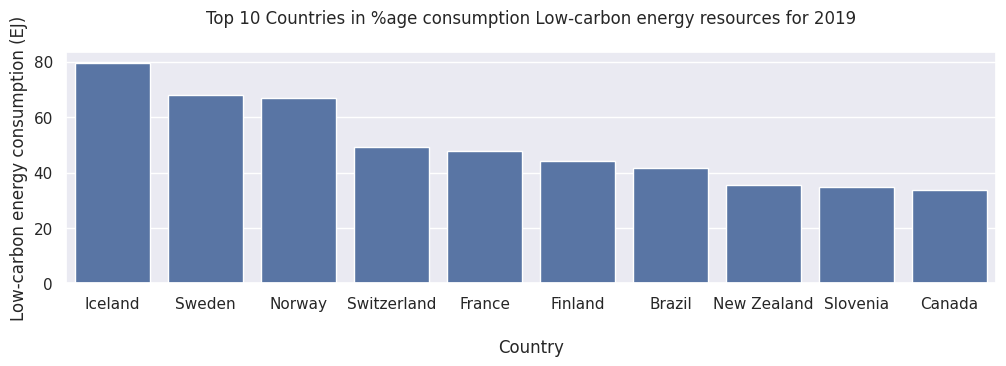

In [54]:
# top countries with maximum renewable energy and nuclear energy consumption
source = pct_sustainable.reset_index().sort_values( by = 'lowcarbon_consumption', ascending=False ).head(10)
sns.set()
plt.figure(figsize=(12,3))
g = sns.barplot(x='country', y= 'lowcarbon_consumption', data= source)
plt.xlabel("\nCountry")
plt.ylabel("Low-carbon energy consumption (EJ)")
plt.title("Top 10 Countries in %age consumption Low-carbon energy resources for 2019\n")
plt.show()